<a href="https://colab.research.google.com/github/ehpub/KFQ_DL_2023-/blob/main/2023_kfq_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EB%89%B4%EC%8A%A4_%EA%B8%B0%EC%82%AC_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

참고 교재: https://www.gilbut.co.kr/book/view?bookcode=BN003496

In [12]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras import models
from keras.datasets import reuters
import numpy as np

In [13]:
(x_train,y_train),(x_test,y_test) = reuters.load_data(num_words=10000)

In [14]:
print(x_train[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [15]:
x_train.shape , x_test.shape

((8982,), (2246,))

In [16]:
def vectorize_sequences(sequences, dimension=10000):
  result = np.zeros((len(sequences),dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      result[i,j] = 1.
  return result

In [17]:
x_train = vectorize_sequences(x_train)
x_test = vectorize_sequences(x_test)

In [18]:
def to_one_hot(labels,dimension=46):
  re = np.zeros((len(labels),dimension))
  for i, label in enumerate(labels):
    re[i,label]=1
  return re

In [22]:
y_train[:10]

array([ 3,  4,  3,  4,  4,  4,  4,  3,  3, 16])

In [23]:
y_train = to_one_hot(y_train)
y_test = to_one_hot(y_test)
print(y_train[:10])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

In [30]:
model = models.Sequential()
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dense(46,activation="softmax"))

In [31]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='rmsprop',
              metrics=['accuracy'])

In [26]:
x_val = x_train[:1000]
px_train = x_train[1000:]
y_val = y_train[:1000]
py_train = y_train[1000:]

In [32]:
hist = model.fit(px_train,py_train,
                 epochs=100,
                 batch_size=512,
                 validation_data=(x_val,y_val))

Epoch 1/100
16/16 [==============================] - 2s 115ms/step - loss: 2.7183 - accuracy: 0.5009 - val_loss: 1.7949 - val_accuracy: 0.6130
Epoch 2/100
16/16 [==============================] - 1s 82ms/step - loss: 1.5250 - accuracy: 0.6716 - val_loss: 1.3702 - val_accuracy: 0.6930
Epoch 3/100
16/16 [==============================] - 1s 53ms/step - loss: 1.1653 - accuracy: 0.7433 - val_loss: 1.1906 - val_accuracy: 0.7370
Epoch 4/100
16/16 [==============================] - 1s 53ms/step - loss: 0.9485 - accuracy: 0.7973 - val_loss: 1.0687 - val_accuracy: 0.7580
Epoch 5/100
16/16 [==============================] - 1s 54ms/step - loss: 0.7865 - accuracy: 0.8287 - val_loss: 0.9983 - val_accuracy: 0.7890
Epoch 6/100
16/16 [==============================] - 1s 54ms/step - loss: 0.6594 - accuracy: 0.8567 - val_loss: 0.9397 - val_accuracy: 0.7950
Epoch 7/100
16/16 [==============================] - 1s 54ms/step - loss: 0.5538 - accuracy: 0.8782 - val_loss: 0.8927 - val_accuracy: 0.8080
Epoch

In [28]:
import matplotlib.pyplot as plt

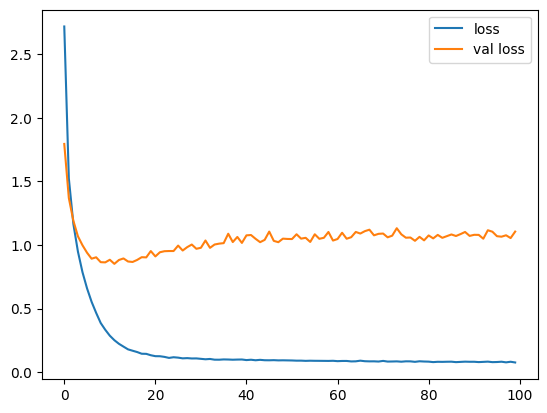

In [33]:
plt.plot(hist.history['loss'],label='loss')
plt.plot(hist.history['val_loss'],label='val loss')
plt.legend()
plt.show()

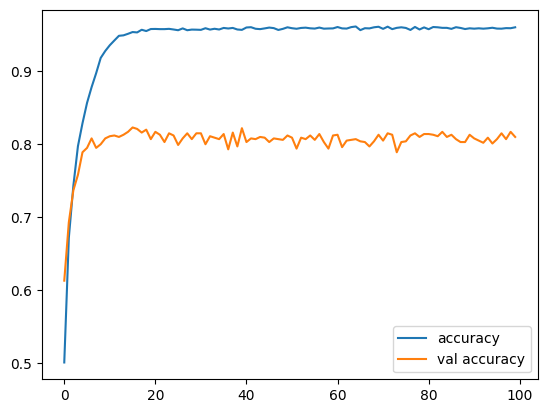

In [34]:
plt.plot(hist.history['accuracy'],label='accuracy')
plt.plot(hist.history['val_accuracy'],label='val accuracy')
plt.legend()
plt.show()

In [37]:
model = models.Sequential()
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dense(46,activation="softmax"))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='rmsprop',
              metrics=['accuracy'])
hist = model.fit(x_train,y_train,
                 epochs=9,
                 batch_size=512)
model.evaluate(x_test,y_test)

Epoch 1/9
18/18 [==============================] - 2s 47ms/step - loss: 2.6451 - accuracy: 0.4785
Epoch 2/9
18/18 [==============================] - 1s 47ms/step - loss: 1.4925 - accuracy: 0.6878
Epoch 3/9
18/18 [==============================] - 1s 82ms/step - loss: 1.1432 - accuracy: 0.7514
Epoch 4/9
18/18 [==============================] - 2s 85ms/step - loss: 0.9294 - accuracy: 0.8028
Epoch 5/9
18/18 [==============================] - 1s 47ms/step - loss: 0.7679 - accuracy: 0.8373
Epoch 6/9
18/18 [==============================] - 1s 48ms/step - loss: 0.6343 - accuracy: 0.8644
Epoch 7/9
18/18 [==============================] - 1s 47ms/step - loss: 0.5261 - accuracy: 0.8913
Epoch 8/9
18/18 [==============================] - 1s 47ms/step - loss: 0.4443 - accuracy: 0.9084
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 0.9500 - accuracy: 0.7809


[0.9499990940093994, 0.7809438705444336]

In [38]:
pred = model.predict(x_test)

71/71 [==============================] - 1s 10ms/step


In [40]:
for p in pred[0]:
  print(f'{p:.2f}',end=' ')

0.00 0.00 0.00 0.96 0.03 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 

In [41]:
y_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [43]:
np.sum(pred[0])

1.0000001

In [44]:
a = np.array([0.2,0.3,0.4,0.1,0.6,0.7])
sum(a)

2.3

In [45]:
b = a/sum(a)

In [46]:
b

array([0.08695652, 0.13043478, 0.17391304, 0.04347826, 0.26086957,
       0.30434783])

In [49]:
np.sum(b)

1.0

In [51]:
r = 0
for _ in range(20):
  r += 0.1
  print(r)

0.1
0.2
0.30000000000000004
0.4
0.5
0.6
0.7
0.7999999999999999
0.8999999999999999
0.9999999999999999
1.0999999999999999
1.2
1.3
1.4000000000000001
1.5000000000000002
1.6000000000000003
1.7000000000000004
1.8000000000000005
1.9000000000000006
2.0000000000000004


In [52]:
(x_train,y_train),(x_test,y_test) = reuters.load_data(num_words=10000)

In [53]:
x_train = vectorize_sequences(x_train)
x_test = vectorize_sequences(x_test)

In [56]:
model = models.Sequential()
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dense(46,activation="softmax"))
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer='rmsprop',
              metrics=['accuracy'])
hist = model.fit(x_train,y_train,
                 epochs=9,
                 batch_size=512)
model.evaluate(x_test,y_test)

Epoch 1/9
18/18 [==============================] - 2s 89ms/step - loss: 2.5428 - accuracy: 0.4535
Epoch 2/9
18/18 [==============================] - 1s 62ms/step - loss: 1.4561 - accuracy: 0.6866
Epoch 3/9
18/18 [==============================] - 1s 45ms/step - loss: 1.1165 - accuracy: 0.7540
Epoch 4/9
18/18 [==============================] - 1s 45ms/step - loss: 0.9038 - accuracy: 0.8051
Epoch 5/9
18/18 [==============================] - 1s 46ms/step - loss: 0.7372 - accuracy: 0.8440
Epoch 6/9
18/18 [==============================] - 1s 45ms/step - loss: 0.6124 - accuracy: 0.8749
Epoch 7/9
18/18 [==============================] - 1s 45ms/step - loss: 0.5069 - accuracy: 0.8956
Epoch 8/9
18/18 [==============================] - 1s 44ms/step - loss: 0.4245 - accuracy: 0.9086
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 0.9038 - accuracy: 0.7956


[0.9037559032440186, 0.7956367135047913]